In [ ]:
# Install tensorflowjs for download model
!pip install tensorflowjs

In [138]:
# Declare constants
EPOCHS: int = 15
BATCH_SIZE: int = 128
TEST_SIZE: float = 0.1
TEST_BATCH_SIZE: int = 64
RANDOM_STATE: int = 42
NUM_CLASSES: int = 10
IMAGE_SHAPE: tuple = (28, 28, 1)

In [133]:
from keras.datasets import mnist

# Load dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [134]:
import numpy as np
from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split

# Normalize images
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Label encoding
y_train = to_categorical(y_train, num_classes=NUM_CLASSES)
y_test = to_categorical(y_test, num_classes=NUM_CLASSES)

# Split data for validation
x_train, x_val, y_train, y_val = train_test_split(x_train,
                                                  y_train,
                                                  test_size=TEST_SIZE,
                                                  random_state=RANDOM_STATE)
x_test_copy = np.array(x_test, copy=True)  

In [135]:
# Reshape input images (n_samples, w, h, 1)
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_val = x_val.reshape(x_val.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

print('|==== Shapes ====|', '\n')

print(f'x_train shape: {x_train.shape}')
print(f'y_train shape: {y_train.shape}', '\n')

print(f'x_val shape: {x_val.shape}')
print(f'y_val shape: {y_val.shape}', '\n')

print(f'x_test shape: {x_test.shape}')
print(f'y_test shape: {y_test.shape}', '\n')

print('|==== Samples ====|', '\n')

print(f'train samples: {x_train.shape[0]}')
print(f'validation samples: {x_val.shape[0]}')
print(f'test samples: {x_test.shape[0]}', '\n')

|==== Shapes ====| 

x_train shape: (54000, 28, 28, 1)
y_train shape: (54000, 10) 

x_val shape: (6000, 28, 28, 1)
y_val shape: (6000, 10) 

x_test shape: (10000, 28, 28, 1)
y_test shape: (10000, 10) 

|==== Samples ====| 

train samples: 54000
validation samples: 6000
test samples: 10000 



In [139]:
# Build the FC model

from tensorflow.keras import Input, Sequential, layers

print('|==== Building the model... ====|', '\n')
model = Sequential([
                    layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=IMAGE_SHAPE),
                    layers.Conv2D(64, (3, 3), activation='relu'),
                    layers.MaxPool2D(pool_size=(2, 2)),
                    layers.Dropout(0.25),
                    layers.Flatten(),
                    layers.Dense(128, activation='relu'),
                    layers.Dropout(0.5),
                    layers.Dense(10, activation='softmax')
])

model.summary()

|==== Building the model... ====| 

Model: "sequential_31"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 conv2d_11 (Conv2D)          (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 12, 12, 64)       0         
 2D)                                                             
                                                                 
 dropout_23 (Dropout)        (None, 12, 12, 64)        0         
                                                                 
 flatten_6 (Flatten)         (None, 9216)              0         
                                                                 
 dense_24 (Dense)            (None, 128)               1179776   
                 

In [140]:
# Train the model

from tensorflow.keras.optimizers import Adam

adam = Adam()
model.compile(loss='categorical_crossentropy',
              optimizer=adam, metrics=['accuracy'])

print('|==== Training the model... ====|', '\n')
history = model.fit(x_train,
                    y_train,
                    validation_data=(x_val, y_val),
                    epochs=EPOCHS,
                    batch_size=BATCH_SIZE)

|==== Training the model... ====| 

Epoch 1/15
422/422 [==============================] - 132s 311ms/step - loss: 0.2574 - accuracy: 0.9217 - val_loss: 0.0622 - val_accuracy: 0.9802
Epoch 2/15
422/422 [==============================] - 131s 311ms/step - loss: 0.0915 - accuracy: 0.9725 - val_loss: 0.0466 - val_accuracy: 0.9857
Epoch 3/15
422/422 [==============================] - 131s 311ms/step - loss: 0.0681 - accuracy: 0.9796 - val_loss: 0.0374 - val_accuracy: 0.9890
Epoch 4/15
422/422 [==============================] - 131s 311ms/step - loss: 0.0547 - accuracy: 0.9830 - val_loss: 0.0354 - val_accuracy: 0.9895
Epoch 5/15
422/422 [==============================] - 132s 313ms/step - loss: 0.0450 - accuracy: 0.9863 - val_loss: 0.0334 - val_accuracy: 0.9898
Epoch 6/15
422/422 [==============================] - 131s 310ms/step - loss: 0.0410 - accuracy: 0.9870 - val_loss: 0.0336 - val_accuracy: 0.9908
Epoch 7/15
422/422 [==============================] - 131s 309ms/step - loss: 0.0364 - a

In [141]:
# Evaluate the model

from sklearn.metrics import classification_report

print('|==== Evaluating the model... ====|', '\n')

target_names = [str(label) for label in range(NUM_CLASSES)]
predictions = model.predict(x_test, batch_size=TEST_BATCH_SIZE)
report = classification_report(y_test.argmax(axis=1),
                               predictions.argmax(axis=1),
                               target_names=target_names)
print(report, '\n')

scores = model.evaluate(x_test, y_test, verbose=0)
print("Test accuracy: {:.4f}".format(scores[1]))

|==== Evaluating the model... ====| 

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.99      1.00      0.99      1032
           3       0.99      1.00      1.00      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000
 

Test accuracy: 0.9925


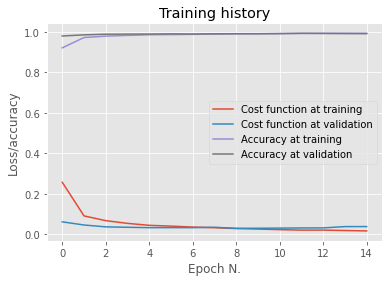

In [142]:
# Plot model cost function iterations in training session

import matplotlib.pyplot as plt

plt.style.use('ggplot')
plt.figure()

epoch_values = list(range(EPOCHS))
plt.plot(epoch_values, history.history['loss'], label='Cost function at training')
plt.plot(epoch_values, history.history['val_loss'], label='Cost function at validation')
plt.plot(epoch_values, history.history['accuracy'], label='Accuracy at training')
plt.plot(epoch_values, history.history['val_accuracy'], label='Accuracy at validation')

plt.title('Training history')
plt.xlabel('Epoch N.')
plt.ylabel('Loss/accuracy')
plt.legend()

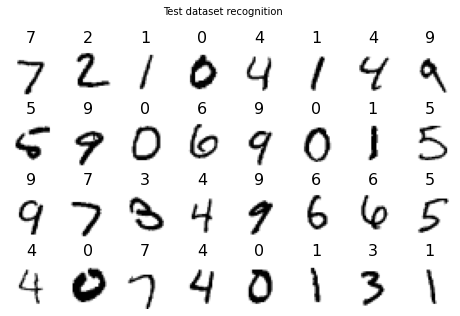

In [144]:
# Plot the images in a grid
size = 32
rows = 4
f = plt.figure(figsize=(size // rows, rows + 1))
plt.suptitle("Test dataset recognition", fontsize=10)
for i in range(size):
    sp = f.add_subplot(rows, -(-size // rows), i + 1)
    sp.axis('Off')
    plt.imshow(x_test_copy[i][:,:], cmap='gray_r')
    sp.set_title(predictions[i].argmax(), fontsize=16)

In [146]:
%rm keras.h5
model.save('keras.h5')

In [147]:
%rm -r model
%mkdir model

!tensorflowjs_converter --input_format keras keras.h5 model/

In [148]:
# Download model
from google.colab import files
!zip -r model.zip model
files.download('model.zip')

updating: model/ (stored 0%)
updating: model/model.json (deflated 78%)
  adding: model/group1-shard2of2.bin (deflated 7%)
  adding: model/group1-shard1of2.bin (deflated 7%)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>